***


# Hackathon de Rayane Bengaoui sur un dataset fourni par Seelk#




Cet exercice a pour but de démontrer mes compétences sur un cas concret fourni par Seelk

<div class="alert alert-block alert-info">
<b>Remarque:</b> Le cellules bleues symboliseront les remarques que je ferais tout au long de mon analyse.
</div>

Cette analyse s'organise en plusieurs parties :

- **1. Identification du type de fichier**
- **2. Nettoyage des données**
- **3. Importance des features**
- **4. Gérer un dataset déséquilibré**
- **5. Choisir et évaluer un modèle**
- **6. Régler les paramètres des modèles**
- **7. Bilan**


***

## 1. Identification du type de fichier

In [102]:
#import du module "os"
import os



#Permet de définir mon répertoire de travail où se trouvent le dataset et mes différentes screenshots
os.chdir('D:/Travail/Projet_Seelk') 





Tout d'abord je décide d'ouvrir le fichier **CSV** sous un éditeur de texte **(Notepad++)** pour identifier sa structure.

***

<b><center>
    
### Fichier ouvert sous un éditeur de texte###

</center></b>

Fichier ouvert sous un éditeur de texte.

![Kernel & front-end diagram](Images/1.Ouverture_Notepad.png)

***

La première chose que je repère est le **délimiteur** du fichier, chaque colonne est séparée par le charactère '**;**' ce qui me sera utile juste après lorsque je voudrais lire le fichier. <br /><br />
Je distingue aussi les différents attributs des colonnes ainsi que le contenu de chaque ligne cependant cela reste illisible je décide donc d'utiliser la librairie **Pandas** pour pouvoir charger mes données dans un Dataframe.

In [103]:
# Import des différentes librairies 
import pandas as pd 



#Stock la donnée dans un DataFrame en indiquant ';' comme délimiteur 
data = pd.read_csv("Seelk+Data+Science+Hackathon.csv",sep=';') 

# Aperçu des 5 premières lignes du fichier
data.head()

,offer,scraping_date,buy_box_owner,owner_merchant_id,price_currency,delivery_details,condition,seller_name,rating_text,products_details,fba_text,add_to_basket,url,offer_ranking,merchant_id,shipping_cost,is_global_store,is_prime
0,7247,2018-05-31,Verkauf und Versand durch Die NaturApotheke. F...,A2YQFBJ9TJXWZ0,"EUR 19,17","+ EUR 3,95 Versandkosten",Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,None,In den Einkaufswagen von Verkäufer Die NaturAp...,https://www.amazon.de/gp/offer-listing/B000M45...,1,A2YQFBJ9TJXWZ0,"EUR 3,95",False,False
1,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 17,50","+ EUR 17,90 Versandkosten",Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer PICCOLO und...,https://www.amazon.de/gp/offer-listing/B00AUV7...,9,A1OJ6JQSEK83CV,"EUR 17,90",False,False
2,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,09","+ EUR 13,06 Versandkosten",Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Brikoland u...,https://www.amazon.de/gp/offer-listing/B00AUV7...,8,A14OYWBRW8YQ5Q,"EUR 13,06",False,False
3,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 22,90","+ EUR 10,00 Versandkosten",Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Qualazampap...,https://www.amazon.de/gp/offer-listing/B00AUV7...,7,A1H4RFP0B0FMHY,"EUR 10,00",False,False
4,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,34","+ EUR 11,90 Versandkosten",Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer Initpc und ...,https://www.amazon.de/gp/offer-listing/B00AUV7...,6,A1VCQKXS62I5R,"EUR 11,90",False,False


Le fichier est maintenant bien plus lisible, je peux dissocier les différentes colonnes. Ce qui m'intéresse maintenant est de comprendre quel genre de fichier il s'agit. <br /><br />Le premier attribut qui attire mon attention est "**scraping_date**" qui m'indique que le contenu du fichier est probablement issu d'un scraping sur le web.<br /><br /> Ensuite les attributs "**seller_name**","**price_currency**", "**delivery_details**" ou encore "**add_to_basket**" m'indiquent très clairement qu'il s'agit d'une page Amazon.<br /><br />Enfin un dernier attribut captive mon attention, il s'agit de "**URL**" qui est composé de... une URL ! De ce fait je copie/colle une URL aléatoire pour avoir un aperçu s'il s'agit d'un lien mort ou bien d'un lien actif.

***

<b><center>
    
### URL de l'une des colonnes###

</center></b>

Vérification sous Excel.

![Kernel & front-end diagram](Images/2.Excel.png)

***

En effet, il s'agit bien d'une page Amazon correspondant à un article spécifique et ses différents vendeurs.

## 2. Nettoyage des données

Après avoir ouvert le fichier j'ai pu remarquer que le dataset contenait des nombreuses informations erronées qu'il faut traiter. <br /><br />De plus, mon but est d'obtenir uniquement des valeurs numériques sur mon dataset final afin de pouvoir l'utiliser dans un modèle.

In [104]:
# Nombre de colonnes
column_nb = len(data.columns)

print("Le dataset comporte {} colonnes".format(column_nb))

Le dataset comporte 18 colonnes


In [105]:
print("Le dataset comporte les colonnes suivates :")

for col in data.columns:
    print(col)

Le dataset comporte les colonnes suivates :
offer
scraping_date
buy_box_owner
owner_merchant_id
price_currency
delivery_details
condition
seller_name
rating_text
products_details
fba_text
add_to_basket
url
offer_ranking
merchant_id
shipping_cost
is_global_store
is_prime


In [106]:
#Type des colonnes
data.dtypes

offer                 int64
scraping_date        object
buy_box_owner        object
owner_merchant_id    object
price_currency       object
delivery_details     object
condition            object
seller_name          object
rating_text          object
products_details     object
fba_text             object
add_to_basket        object
url                  object
offer_ranking         int64
merchant_id          object
shipping_cost        object
is_global_store        bool
is_prime               bool
dtype: object

Je remarque ici que 4/18 des colonnes sont de type '**object**' et donc non exploitables pour mon futur modèle qui nécessitera des colonnes du type **Integer/Float/Boolean** 

Maintenant je vais analyser chaque colonne du dataset pour pouvoir déterminer les features ainsi que la target de mon modèle.

In [107]:
data.head()

,offer,scraping_date,buy_box_owner,owner_merchant_id,price_currency,delivery_details,condition,seller_name,rating_text,products_details,fba_text,add_to_basket,url,offer_ranking,merchant_id,shipping_cost,is_global_store,is_prime
0,7247,2018-05-31,Verkauf und Versand durch Die NaturApotheke. F...,A2YQFBJ9TJXWZ0,"EUR 19,17","+ EUR 3,95 Versandkosten",Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,None,In den Einkaufswagen von Verkäufer Die NaturAp...,https://www.amazon.de/gp/offer-listing/B000M45...,1,A2YQFBJ9TJXWZ0,"EUR 3,95",False,False
1,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 17,50","+ EUR 17,90 Versandkosten",Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer PICCOLO und...,https://www.amazon.de/gp/offer-listing/B00AUV7...,9,A1OJ6JQSEK83CV,"EUR 17,90",False,False
2,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,09","+ EUR 13,06 Versandkosten",Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Brikoland u...,https://www.amazon.de/gp/offer-listing/B00AUV7...,8,A14OYWBRW8YQ5Q,"EUR 13,06",False,False
3,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 22,90","+ EUR 10,00 Versandkosten",Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,None,In den Einkaufswagen von Verkäufer Qualazampap...,https://www.amazon.de/gp/offer-listing/B00AUV7...,7,A1H4RFP0B0FMHY,"EUR 10,00",False,False
4,375109,2018-05-31,Verkauf und Versand durch Amazon. Geschenkverp...,1,"EUR 20,34","+ EUR 11,90 Versandkosten",Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,None,In den Einkaufswagen von Verkäufer Initpc und ...,https://www.amazon.de/gp/offer-listing/B00AUV7...,6,A1VCQKXS62I5R,"EUR 11,90",False,False


### offer :
Id de l'offre.

### scraping_date :
Date durant laquelle le scraping de la page Amazon a été effectué.


### buy_box_owner :
Entreprise détenant la "buy_box" de l'offre.


### owner_merchant_id :
Id de l'entreprise detenant la "buy_box".


### price_currency :
Prix de l'offre.

### delivery_details :
Prix de la livraison.

### condition :
Etat du bien.

### seller_name :
Nom du vendeur de l'offre.

### rating_text :
Note et pourcentage de commentaires positifs de l'offre.

### products_details :
Estimation de la date de livraison.

### fba_text :
?

### add_to_basket :
Label du bouton "Ajouter au panier".

### url :
URL de l'offre.

### offer_ranking :
Rang de l'offre par rapport à la buy_box.

### merchant_id :
Id du vendeur de l'offre.

### shipping_cost :
Prix de la livraison.

### is_global_store :
Indique s'il s'agit d'un vendeur global.

### is_prime :
Indique si l'offre dispose de l'option Amazon Prime.

***

Le but est de savoir parmi ces offres, lesquelles vont gagner la buy_box. Pour cela il faut que je choisisse les différentes **features** de mon modèle ainsi que ma **target**. <br /><br />

Pour la target je choisis la colonne **offer_ranking** puisqu'il s'agit de la colonne qui indique la position de l'offre par rapport à la buy_box. Donc un **offer_ranking** de 1 signifie que l'offre a gagné la buy_box. <br /><br />

Ensuite parmi les différentes colonnes présentes je vais effectuer un premier tri en enlevant les colonnes que je juge non pertinentes.

<span style="color:red"><b>NON-PERTINENT: </b></span><br />

- <b>owner_merchant_id:</b> Il s'agit d'un ID ce qui n'apporte pas d'information utile par rapport au ranking.
<br /><br />
- <b>merchant_id:</b> Pareil que "owner_merchant_id".
<br /><br />
- <b>buy_box_owner:</b> La colonne "offer_ranking" donne directement la position de l'offre qui est ma target, je n'ai pas besoin du nom du vendeur gagnant.
<br /><br />
- <b>fba_text:</b> Majoritairement remplie de valeurs null cette colonne n'est pas utile.
<br /><br />
- <b>add_to_basket:</b> Il s'agit du label d'un bouton ce qui est peu intéressant, bien que parfois le prix soit inclu avec je préfere utiliser une autre colonne pour récupérer le prix.
<br /><br />
- <b>url:</b> L'URL de l'offre qui n'impacte pas son positionnement pour la place de gagnant de la buy_box
<br /><br />
- <b>delivery_details:</b> Cette colonne est utile néanmoins la colonne "shipping_cost" contient la même information avec moins d'information à traiter ce qui rend "delivery_details" obsolète.


In [108]:
# On enlève les colonnes citées ci-dessus de notre dataframe
data = data.drop(['owner_merchant_id','merchant_id','buy_box_owner', 'fba_text','add_to_basket','url','delivery_details'], axis=1)

In [109]:
data.head()

,offer,scraping_date,price_currency,condition,seller_name,rating_text,products_details,offer_ranking,shipping_cost,is_global_store,is_prime
0,7247,2018-05-31,"EUR 19,17",Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False
1,375109,2018-05-31,"EUR 17,50",Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False
2,375109,2018-05-31,"EUR 20,09",Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False
3,375109,2018-05-31,"EUR 22,90",Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False
4,375109,2018-05-31,"EUR 20,34",Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False


***

***

Maintenant je vais traiter chaque colonne pour voir si je peux séparer l'information et les convertir en valeurs numériques. Je commence par la colonne **scraping_date** comme la colonne **offer** est déjà au format Integer.

Comme la date est au format DateTime, il est facile de la manipuler. Je choisis donc de créer 3 nouvelles colonnes qui seront "**year**", "**month**" et "**day**" pour pouvoir dissocier les différents éléments de mes dates.

In [110]:
# Créer 3 nouvelles colonnes
data['year'] = pd.DatetimeIndex(data['scraping_date']).year
data['month'] = pd.DatetimeIndex(data['scraping_date']).month
data['day'] = pd.DatetimeIndex(data['scraping_date']).day

# Supprimer la colonne "scrapping_date"
data = data.drop(['scraping_date'], axis=1)
                  
data.head()

,offer,price_currency,condition,seller_name,rating_text,products_details,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day
0,7247,"EUR 19,17",Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False,2018,5,31
1,375109,"EUR 17,50",Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False,2018,5,31
2,375109,"EUR 20,09",Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False,2018,5,31
3,375109,"EUR 22,90",Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False,2018,5,31
4,375109,"EUR 20,34",Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False,2018,5,31


***

Maintenant passons à la colonne **price_currency**, je vais déjà afficher les valeurs principales de celle-ci pour avoir une idée du format des prix.

In [111]:
data.price_currency.value_counts()

EUR 0,01      2626
EUR 4,99      1515
£5.99         1356
EUR 9,99      1339
£6.99         1267
EUR 8,50      1157
£9.99         1045
EUR 14,99      988
EUR 3,99       963
EUR 6,99       955
EUR 9,95       952
£8.99          949
EUR 11,00      944
EUR 7,99       931
£4.99          931
EUR 11,99      930
EUR 16,00      907
EUR 19,90      900
EUR 12,00      888
EUR 15,00      877
EUR 10,00      875
EUR 8,99       830
EUR 9,90       793
EUR 8,00       790
EUR 20,00      776
EUR 5,99       771
EUR 8,90       769
£3.99          730
£7.99          729
£19.99         720
              ... 
EUR 76,64        1
EUR 40,53        1
$59.81           1
$72.85           1
EUR 51,53        1
EUR 94,50        1
£78.57           1
EUR 58,66        1
£106.99          1
$5.13            1
£79.70           1
$4.62            1
£28.47           1
EUR 98,63        1
EUR 121,75       1
£27.65           1
£17.53           1
EUR 133,62       1
EUR 198,76       1
$47.35           1
£30.54           1
EUR 107,25  

Ici on peut voir que ce qui ressort le plus souvent sont des prix :

- en Euro
- en Dollar
- en Livre

avec comme spécificité que les prix en euros sont séparés par un espace (EUR 10) contrairement aux dollars/livres qui eux sont directement attachés ($3/£4) <br />

De ce fait, je vais convertir tous les prix en euros afin d'homogénéiser ma colonne de prix.

In [112]:
#Exemple du résultat de la fonction split() sur une ligne, on peut voir qu'il nous suffit
#de garder seulement le 2ème index du tableau

data.price_currency[0].split()

['EUR', '19,17']

In [113]:
#On enlève les quelques valeurs qui étaient à None
data = data[data.price_currency != 'None']


In [114]:
pd.options.mode.chained_assignment = None

def convertDollar(number):
    """
    Convertit un prix en dollars en euro
    
    Exemple:
    
    money = 3$
    
    >>> convertDollar(3)
    2.7
    """
    
    return  number * 0.9


def convertLivreSterling(number):
    """
    Convertit un prix en livre en euro
    
    Exemple:
    
    money = 3£
    
    >>> convertLivreSterling(3)
    3.48
    """
    
    return number * 1.16



def changeCurrency(myList):
    """
    Retourne un prix en euro en traitant les différentes devises et les virgules/points dans les nombres
    """
   
    # Remplace l'ensemble des ',' dans le mot afin de standardiser le format et de pouvoir le convertir en float
    myList = myList.replace(',','.')
   
  
    # Enlève les différents points dans certains nombre (Exemple: 23.299.999 -> 23.299999)
    if myList.count('.') > 1:
        while myList.count('.') > 1:
            myList = myList[:myList.rfind('.')] + myList[(myList.rfind('.')+1):]
            

    # Les prix en euro sont composés de 2 éléments le 1er est le mot 'EUR' et le 2ème est le prix, je garde donc uniquement le 2ème  
    if len(myList.split())>1:
        myList = float(myList.split()[1])
        
    # Enlève le signe $ et convertit en flaot
    elif myList[0] == '$':
        myList = myList.replace('$','')
        myList = convertDollar(float(myList)) 
    # Enlève le signe £ et convertit en float   
    elif myList[0] == '£':
        myList = myList.replace('£','')
        myList = convertLivreSterling(float(myList)) 
        

    return myList

In [115]:
# On applique la fonction sur la colonne "price_currency"
data['price_currency']= data.price_currency.apply(changeCurrency)

On utilise la fonction **describe()** pour avoir un aperçu global de la **moyenne** des prix ainsi que de **l'écart-type** <br />

Les chiffres obtenus sont plutôt cohérents avec une moyenne ~= 20 et un écart-type ~= 37 ce qui montre qu'il y a peu de dispersion au niveau du prix. De plus, la valeur maximale est d'environ 1159 ce qui est aussi plausible. <br />

Les résultats m'auraient alerté si jamais l'écart-type avait été beaucoup plus élevé avec une valeur maximale au delà des milliers d'euros. Cela aurait signifié que ma fonction de conversion était fausse et que je ne gérais pas correctement le traitement des points/virgules.



In [116]:
data.price_currency.describe()

count    547173.000000
mean         20.042002
std          36.566753
min           0.009000
25%           7.730000
50%          12.924000
75%          22.230000
max        1158.840000
Name: price_currency, dtype: float64

In [117]:
data.head()

,offer,price_currency,condition,seller_name,rating_text,products_details,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day
0,7247,19.17,Neu,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False,2018,5,31
1,375109,17.50,Neu,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False,2018,5,31
2,375109,20.09,Neu,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False,2018,5,31
3,375109,22.90,Neu,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False,2018,5,31
4,375109,20.34,Neu,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False,2018,5,31


***

On passe maintenant à la colonne **condition**

In [118]:
data.condition.value_counts()

New                      197328
Neu                      107691
Neuf                     104396
Nuevo                     70750
Nuovo                     66957
Certified Refurbished         7
Name: condition, dtype: int64

On voit tous les articles sont neufs à l'exception de 7 d'entre eux. Cela pose la question de l'utilité de cette colonne étant donné qu'elle apporte peu d'informations et pourrait même générer de **l'overfitting** dans notre futur modèle. Néanmoins je la garde pour l'instant et reviendrai dessus quand j'utiliserai une **matrice de corrélation** pour vérifier l'impact de cette colonne. <br /><br /> Ici je choisis simplement de passer les offres neuves à 1 et les offres reconditionnées à 0.

In [119]:
liste_neuf = ['New','Neu','Neuf','Nuevo','Nuovo']
liste_occasion =['Certified Refurbished']

# On remplace les termes par 0 ou 1 en fonction de leur présence dans les listes ci-dessus
data.loc[data.condition.isin(liste_neuf), 'condition'] = 1
data.loc[data.condition.isin(liste_occasion), 'condition'] = 0

In [120]:
data.condition.value_counts()

1    547122
0         7
Name: condition, dtype: int64

In [121]:
data.head()

,offer,price_currency,condition,seller_name,rating_text,products_details,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day
0,7247,19.17,1,Die NaturApotheke,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False,2018,5,31
1,375109,17.50,1,PICCOLO,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False,2018,5,31
2,375109,20.09,1,Brikoland,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False,2018,5,31
3,375109,22.90,1,Qualazampapetshop,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False,2018,5,31
4,375109,20.34,1,Initpc,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False,2018,5,31


***

Toujours pareil mais pour la colonne **seller_name** maintenant:

In [122]:
data.seller_name.value_counts()

Stock Bureau Direct                                                                   16881
PARADIS CONSO SAS                                                                      4234
francejouet                                                                            3892
Parkem Retail                                                                          3607
nrsolutions                                                                            3436
FreeShopping                                                                           3303
E-COMMERCE EUROPE                                                                      3281
AZBURO WORLD                                                                           3253
Yeppon                                                                                 3076
Initpc                                                                                 3021
Office Marketplace                                                              

La première chose que je remarque ici est l'absence de Amazon en tant que vendeur qui est incohérent étant donné que je l'avais vu inscrit dans la colonne **buy_box_owner** au début de mon analyse. Je décide de regarder rapidement le fichier sous excel pour essayer de mieux comprendre.

Ouverture d'un URL.

![Kernel & front-end diagram](Images/2.URL.png)

Je vois que presque à chaque fois que la colonne **seller_name** est vide, le **buy_box_owner** contient Amazon. Ainsi je remplace l'ensemble des **seller_name** vident par 1 qui correspondra à Amazon et les autres vendeurs qui seront initialisés à 0.

<div class="alert alert-block alert-info">
    <b>Remarque:</b> Dans la partie suivante sur la colonne **seller_name** je fais une erreur que j'ai remarquée avoir fini mon analyse, l'ensemble des **seller_name** ne correspond pas toujours à Amazon. Je reviens dessus en détails à la fin de l'analyse dans la partie **Bilan**
</div>

In [123]:
# Change les NaN par Amazon
data.seller_name.fillna('Amazon',inplace=True)

# Remplace Amazon par 1 et le reste apr 0
data.loc[(data.seller_name == 'Amazon' ),'seller_name']=1
data.loc[(data.seller_name != 1 ),'seller_name']=0

data.seller_name.value_counts()

0    492025
1     55148
Name: seller_name, dtype: int64

In [124]:
data.head()

,offer,price_currency,condition,seller_name,rating_text,products_details,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day
0,7247,19.17,1,0,5 von 5 Sternen 98% positiv in den letzten 12 ...,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False,2018,5,31
1,375109,17.50,1,0,5 von 5 Sternen 100% positiv in den letzten 12...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False,2018,5,31
2,375109,20.09,1,0,3 von 5 Sternen 57% positiv in den letzten 12 ...,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False,2018,5,31
3,375109,22.90,1,0,"4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...",['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False,2018,5,31
4,375109,20.34,1,0,4 von 5 Sternen 79% positiv. (39 alle Bewertun...,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False,2018,5,31


***

Maintenant je m'intéresse à la colonne **rating_text**.

In [125]:
data.rating_text.value_counts()

None                                                                                        57427
Neuer Verkäufer (Verkäuferprofil)                                                            5844
Just Launched (Seller Profile)                                                               5670
Nuevo vendedor (Perfil del vendedor)                                                         5564
Nouveau Vendeur (Profil du vendeur)                                                          3447
Nuovo venditore (Profilo del venditore)                                                      3092
5 out of 5 stars 100% positive over the past 12 months. (1 total ratings)                    2553
5 sur 5 étoiles 100% positif au cours des derniers 12 mois. (1 évaluations totales)          1785
5 out of 5 stars 100% positive over the past 12 months. (2 total ratings)                    1729
5 von 5 Sternen 100% positiv in den letzten 12 Monaten. (1 Bewertungen insgesamt)            1603
4 sur 5 étoiles 80% 

Je remarque plusieurs choses après avoir affiché certaines valeurs de cette colonne :

- Il y a 57 427 valeurs à 'None'.

- Le texte comporte une note sur 5.

- Il y a un pourcentage qui correspond au nombre d'avis positif.

- Le nombre total de notes est indiqué.
    
De ce fait, je vais pouvoir diviser cette colonne en 4 sous colonnes. 

Pour pallier le problème des valeurs à **None** je définis une colonne **has_rating** qui sera initialisé à 1 si l'offre possède une note et 0 dans le cas contraire.

In [126]:
def createHasRatingColumn(row):
    """
    Retourne 0 si la valeur est égale à 'None', sinon retourne 1.
    """
    
    if row == 'None':
        val = 0
    else:
        val = 1
    
    return val

data['has_rating'] = data.rating_text.apply(createHasRatingColumn)

On obtient 489 746 offres avec une note et 57 427 sans notes.

In [127]:
data.has_rating.value_counts()

1    489746
0     57427
Name: has_rating, dtype: int64

Chaque texte commence par un chiffre entre 0 ou 5. Seules les valeurs à **None** ne commencent pas par un chiffre. De ce fait je crée une nouvelle colonne **rating_mark** qui correspond à la note sur 5 de l'offre.

In [128]:
data.rating_text.head()

0    5 von 5 Sternen 98% positiv in den letzten 12 ...
1    5 von 5 Sternen 100% positiv in den letzten 12...
2    3 von 5 Sternen 57% positiv in den letzten 12 ...
3    4,5 von 5 Sternen 86% positiv. (7 alle Bewertu...
4    4 von 5 Sternen 79% positiv. (39 alle Bewertun...
Name: rating_text, dtype: object

In [129]:
def createRatingMarkColumn(row):
    """
    Retourne 0 si le premier caractère du paramètre n'est pas un chiffre, sinon retourne le 1 caractère de la chaîne en entrée.
    """
    
    #Pour détecter les lignes 'None'
    if not row[0].isdigit():
        val = 0
    else:
        val = float(row[0])
    
    return val

data['rating_mark'] = data.rating_text.apply(createRatingMarkColumn)


Création de la colonne **positive_percentage** qui contient le pourcentage de notes positives de l'offre. Pour cela on cherche le chiffre/nombre attaché au signe '%' puis on l'extrait.

In [130]:
def createPositiveAdviceRateColumn(row):   
    """
    Retourne le nombre entre 0 et 100 avant le premier '%' dans une chaîne de caractères.
    """
    
    index = row.find('%')
    
    #Si le fichier ne contient pas de '%' index sera à -1 donc les offres sans pourcentage seront initialisées à 0.
    if index==-1:
        return -1
    
    #Nombre 100
    elif row[index-3:index]== '100':  
        return 100
    
    #Nombres à 2 digits
    elif row[index-2]== ' ':
        return int(row[index-1])
    
    #Chiffres
    elif row[index-3]== ' ':
        return int(row[index-2:index])

data['positive_percentage'] = data.rating_text.apply(createPositiveAdviceRateColumn)

Création de la colonne **number_of_rates** qui contient le nombre total de notes associées à l'offre. Le nombre de notes est toujours entre parathèse ce qui permettra de l'extraire plus simplement.

In [131]:
def hasNumbers(inputString):
    """
    Retourne True si la chaîne possède au moins 1 chiffre, sinon retourne False.
    """
    return any(char.isdigit() for char in inputString)


def createRateNumbersColumn(row):
    """
    Retourne le nombre après une parenthèse, sinon retourne 0 si le string n'a ni parenthèses ni nombres.
    """
    
    index = row.find('(')
    
    # Retourne 0 si le String ne contient pas de '(' ou de nombres.
    if index==-1 or hasNumbers(row)==False:
        return 0
    
    i = 1
    
    number=''
    
    special_char=['.',',']
    
    # Chaque nombre se termine par un espace, donc tant que je ne recontre pas d'espace je parcours la chaine de caractères.
    while row[index+i]!=' ':
        
        # Des '.' ou ',' séparent parfois les milliers donc je passe au caractère suivant si je rencontre un des deux.
        if row[index+i] in special_char:
            i+=1
            
        # Si il s'agit d'un chiffre je l'ajoute à mon nombre.
        else:
            number = number+row[index+i]
            i+=1
    
    return int(number)
    
        

data['number_of_rates'] = data.rating_text.apply(createRateNumbersColumn)

On a extrait tout ce que l'on souhaitait de la colonne**rating_text**, on peut donc la supprimer.

In [132]:
data = data.drop(['rating_text'], axis=1)

In [133]:
data.head()

,offer,price_currency,condition,seller_name,products_details,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates
0,7247,19.17,1,0,['Lieferung erfolgt 6.-8. Juni. Weitere Inform...,1,"EUR 3,95",False,False,2018,5,31,1,5.0,98,1876
1,375109,17.50,1,0,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,9,"EUR 17,90",False,False,2018,5,31,1,5.0,100,1
2,375109,20.09,1,0,['Lieferung erfolgt 13.-18. Juni. Weitere Info...,8,"EUR 13,06",False,False,2018,5,31,1,3.0,57,54
3,375109,22.90,1,0,['Lieferung erfolgt 15.-20. Juni. Weitere Info...,7,"EUR 10,00",False,False,2018,5,31,1,4.0,86,7
4,375109,20.34,1,0,['Lieferung erfolgt 8.-13. Juni. Weitere Infor...,6,"EUR 11,90",False,False,2018,5,31,1,4.0,79,39


***

On passe à une des dernières colonnes avec beaucoup d'informations : **products_details**

In [134]:
data.products_details.value_counts()

['In stock.', 'Dispatched from United Kingdom.', 'Delivery rates and return policy.']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   11167
['Spedizione da: Italia.', 'Costi di spedizione e politica resi.']                                                                                                                                                                                                                                                                                                                                                                                        

Je remarque que parmi cette masse d'informations il y a la **date d'estimation de livraison** or, comme je possède déjà la date de commande de l'offre (Les 3 colonnes **year**,**month** et **day**) je peux calculer une approximation du **temps de livraison de la commande**.

In [135]:
import re
from math import *


def createDeliveryLengthColumn(row):
    """
    Retourne un entier qui correspond une approximation du temps de livraison en jour, retourne -1 si jamais l'offre 
    ne possède pas d'informations sur la date de livraison.
    """
    
    col_product_details = row['products_details']
    col_day_commande = row['day']
    
    # Stock l'ensemble des nombres
    temp = re.findall(r'\b\d+\b', col_product_details)
    
    if len(temp)>=2:
        number1 = int(temp[0])
        number2= int(temp[1])
        
        arrival_time = floor(float((number2 + number1)/2))
        
        if col_day_commande < arrival_time:
            shipping_length = arrival_time - col_day_commande
            return int(shipping_length)
        
        elif col_day_commande >= arrival_time:
            shipping_length = (31 - col_day_commande)+ arrival_time
            return int(shipping_length)
                 
    else:
        return -1
    
   
       
data['delivery_length'] = data.apply(createDeliveryLengthColumn, axis=1)

<div class="alert alert-block alert-info">
    <b>Remarque:</b> Cette fonction comporte des erreurs qui  pénaliseront peu le résultat final mais dont je reviendrai plus en détails dans la partie Bilan
</div>

In [136]:
data.delivery_length.value_counts()

-1      89566
 4      46171
 5      45155
 8      38844
 6      36659
 9      31809
 10     30669
 11     23402
 7      21345
 12     20404
 3      15746
 13     15113
 22     10558
 14      9668
 24      9603
 25      8550
 21      7933
 23      7798
 26      7683
 27      7493
 20      7409
 15      7296
 19      6394
 18      5724
 28      5483
 30      4843
 16      4559
 1       4492
 17      4474
 29      4397
 31      4151
 2       3771
 955        7
 991        2
 984        2
Name: delivery_length, dtype: int64

Je vois que j'ai 11 colonnes qui ont des valeurs supérieures à 31 ce qui est impossible. L'erreur vient du fait que je fais une approximation entre 2 valeurs puis je gère la transition entre les mois juste en soustrayant 31 à la date de commande alors qu'il y a des mois qui finissent au bout de 30 jours. <br /><br />

Comme il s'agit d'uniquement 11 colonnes je décide de les supprimer pour gagner du temps.

In [137]:
data.loc[(data.delivery_length >31 ),'delivery_length']=-1

In [138]:
data.delivery_length.value_counts()

-1     89577
 4     46171
 5     45155
 8     38844
 6     36659
 9     31809
 10    30669
 11    23402
 7     21345
 12    20404
 3     15746
 13    15113
 22    10558
 14     9668
 24     9603
 25     8550
 21     7933
 23     7798
 26     7683
 27     7493
 20     7409
 15     7296
 19     6394
 18     5724
 28     5483
 30     4843
 16     4559
 1      4492
 17     4474
 29     4397
 31     4151
 2      3771
Name: delivery_length, dtype: int64

On supprime la colonne **products_details**

In [139]:
data = data.drop(['products_details'], axis=1)

data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length
0,7247,19.17,1,0,1,"EUR 3,95",False,False,2018,5,31,1,5.0,98,1876,7
1,375109,17.50,1,0,9,"EUR 17,90",False,False,2018,5,31,1,5.0,100,1,10
2,375109,20.09,1,0,8,"EUR 13,06",False,False,2018,5,31,1,3.0,57,54,15
3,375109,22.90,1,0,7,"EUR 10,00",False,False,2018,5,31,1,4.0,86,7,17
4,375109,20.34,1,0,6,"EUR 11,90",False,False,2018,5,31,1,4.0,79,39,10


***

On finit avec la colonne **shipping_cost** :

In [140]:
data.shipping_cost.value_counts()

None         258082
EUR 2,99      11895
EUR 3,00       8801
£2.99          6299
EUR 3,99       6089
EUR 10,00      4414
EUR 4,99       4292
EUR 7,00       3671
EUR 5,99       3246
EUR 30,00      3077
EUR 4,50       2939
EUR 15,00      2909
EUR 9,99       2898
EUR 14,99      2671
EUR 6,90       2628
EUR 6,99       2537
EUR 12,00      2499
EUR 3,50       2403
EUR 3,95       2397
EUR 3,90       2343
EUR 7,50       2171
EUR 8,90       2151
$3.99          2144
£5.40          2066
EUR 7,99       2028
EUR 15,18      1947
EUR 10,90      1921
£3.99          1873
EUR 13,00      1826
EUR 9,90       1807
              ...  
£21.50            1
EUR 23,32         1
EUR 17,37         1
EUR 13,28         1
EUR 7,45          1
£6.19             1
£33.89            1
£10.83            1
£13.85            1
EUR 15,51         1
EUR 21,07         1
EUR 16,16         1
£16.58            1
EUR 11,71         1
EUR 34,26         1
£11.35            1
£22.64            1
$16.18            1
EUR 4,41          1


La colonne **shipping_cost** est au même format que **price_currency** je peux donc réutiliser ma fonction **changeCurrency()** pour uniformiser la colonne.

In [141]:
data['shipping_cost'] = data.shipping_cost.apply(changeCurrency)

In [142]:
data.shipping_cost.value_counts()

None                  258082
2.99                   11895
3.0                     8801
3.4684                  6299
3.99                    6089
10.0                    4414
4.99                    4292
7.0                     3671
5.99                    3246
30.0                    3077
4.5                     2953
15.0                    2909
9.99                    2898
14.99                   2671
6.9                     2628
6.99                    2537
12.0                    2499
3.5                     2403
3.95                    2397
3.9                     2343
7.5                     2171
8.9                     2151
3.591                   2144
6.264                   2070
7.99                    2028
15.18                   1947
10.9                    1921
4.6284                  1873
13.0                    1826
9.9                     1807
                       ...  
20.47                      1
1.746                      1
41.06399999999999          1
0.16          

Les valeurs à **None** représentent les livraisons gratuites/offertes, je les initialise donc à 0.

In [143]:
data.loc[(data.shipping_cost =='None' ),'shipping_cost']=0

In [144]:
data.shipping_cost.value_counts()

0.0000     258082
2.9900      11895
3.0000       8801
3.4684       6299
3.9900       6089
10.0000      4414
4.9900       4292
7.0000       3671
5.9900       3246
30.0000      3077
4.5000       2953
15.0000      2909
9.9900       2898
14.9900      2671
6.9000       2628
6.9900       2537
12.0000      2499
3.5000       2403
3.9500       2397
3.9000       2343
7.5000       2171
8.9000       2151
3.5910       2144
6.2640       2070
7.9900       2028
15.1800      1947
10.9000      1921
4.6284       1873
13.0000      1826
9.9000       1807
            ...  
18.0496         1
19.2300         1
27.7000         1
0.1600          1
8.0388          1
17.2900         1
6.8092          1
5.8696          1
14.6300         1
15.6600         1
17.1600         1
8.1270          1
16.7100         1
9.8000          1
5.4270          1
12.4500         1
12.3656         1
6.5520          1
30.9100         1
5.0576          1
29.4100         1
16.5900         1
17.3000         1
18.8000         1
5.0130    

In [145]:
data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length
0,7247,19.17,1,0,1,3.95,False,False,2018,5,31,1,5.0,98,1876,7
1,375109,17.50,1,0,9,17.9,False,False,2018,5,31,1,5.0,100,1,10
2,375109,20.09,1,0,8,13.06,False,False,2018,5,31,1,3.0,57,54,15
3,375109,22.90,1,0,7,10,False,False,2018,5,31,1,4.0,86,7,17
4,375109,20.34,1,0,6,11.9,False,False,2018,5,31,1,4.0,79,39,10


***

In [146]:
data.dtypes

offer                    int64
price_currency         float64
condition               object
seller_name              int64
offer_ranking            int64
shipping_cost           object
is_global_store           bool
is_prime                  bool
year                     int64
month                    int64
day                      int64
has_rating               int64
rating_mark            float64
positive_percentage      int64
number_of_rates          int64
delivery_length          int64
dtype: object

Toutes les colonnes sont exploitables à l'exception de **condition** et **shipping_cost** que j'avais laissé en type **object**. Je change les deux colonnes en **Boolean** et **Float** pour pouvoir les utiliser.

In [147]:
data['shipping_cost']= data['shipping_cost'].astype(str).astype(float)
data['condition']= data['condition'].astype(bool)

In [148]:
data.dtypes

offer                    int64
price_currency         float64
condition                 bool
seller_name              int64
offer_ranking            int64
shipping_cost          float64
is_global_store           bool
is_prime                  bool
year                     int64
month                    int64
day                      int64
has_rating               int64
rating_mark            float64
positive_percentage      int64
number_of_rates          int64
delivery_length          int64
dtype: object

In [149]:
data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length
0,7247,19.17,True,0,1,3.95,False,False,2018,5,31,1,5.0,98,1876,7
1,375109,17.50,True,0,9,17.90,False,False,2018,5,31,1,5.0,100,1,10
2,375109,20.09,True,0,8,13.06,False,False,2018,5,31,1,3.0,57,54,15
3,375109,22.90,True,0,7,10.00,False,False,2018,5,31,1,4.0,86,7,17
4,375109,20.34,True,0,6,11.90,False,False,2018,5,31,1,4.0,79,39,10


***

In [150]:
data.is_prime.value_counts()

False    480795
True      66378
Name: is_prime, dtype: int64

In [151]:
data.is_global_store.value_counts()

False    547171
True          2
Name: is_global_store, dtype: int64

Je ne modifie pas les colonnes **is_global_store** et **is_prime** qui sont déjà au bon format et sans erreur.

***

Je décide de créer une dernière colonne **total_price** qui regroupe le prix de l'offre et de la livraison.

In [152]:
def createTotalPrice(row):
    """
    Retourne la somme d'un prix de 'price_currency' et 'shipping_cost'
    """
    
    col_product_price = row['price_currency']
    col_shipping_price = row['shipping_cost']
    
    return float(col_product_price + col_shipping_price)
    
      
data['total_price'] = data.apply(createTotalPrice, axis=1)

In [153]:
data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length,total_price
0,7247,19.17,True,0,1,3.95,False,False,2018,5,31,1,5.0,98,1876,7,23.12
1,375109,17.50,True,0,9,17.90,False,False,2018,5,31,1,5.0,100,1,10,35.40
2,375109,20.09,True,0,8,13.06,False,False,2018,5,31,1,3.0,57,54,15,33.15
3,375109,22.90,True,0,7,10.00,False,False,2018,5,31,1,4.0,86,7,17,32.90
4,375109,20.34,True,0,6,11.90,False,False,2018,5,31,1,4.0,79,39,10,32.24


***

***

## 3. Importance des features



![Kernel & front-end diagram](Images/3.but.png)
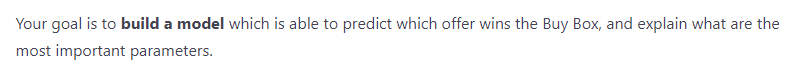

En reprenant l'énoncé, je comprends que le but est de savoir si **OUI** ou **NON** une offre est gagnante de la Buy Box. Donc que la position dans le ranking importe peu. Je décide donc de tourner le problème vers un problème de **classification** avec **offer_ranking == 1** les offres gagnantes et **offer_ranking ==0** les offres non-gagnantes donc 2,3, etc ... .

In [154]:
data.loc[(data.offer_ranking > 1 ),'offer_ranking']=0

In [155]:
data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,year,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length,total_price
0,7247,19.17,True,0,1,3.95,False,False,2018,5,31,1,5.0,98,1876,7,23.12
1,375109,17.50,True,0,0,17.90,False,False,2018,5,31,1,5.0,100,1,10,35.40
2,375109,20.09,True,0,0,13.06,False,False,2018,5,31,1,3.0,57,54,15,33.15
3,375109,22.90,True,0,0,10.00,False,False,2018,5,31,1,4.0,86,7,17,32.90
4,375109,20.34,True,0,0,11.90,False,False,2018,5,31,1,4.0,79,39,10,32.24


Maintenant je vais utiliser une **Matrice de corrélation** pour voir quelles sont les features qui influent le plus sur le ranking de l'offre.<br /><br />
Mais avant je supprime la colonne **year** car lors de l'affichage de la matrice la colonne/ligne liée à **year** était blanche ce qui signifie que **year** ne dispose que d'une seule valeur qui est '2018'.

In [156]:
data.year.value_counts()

2018    547173
Name: year, dtype: int64

In [157]:
data = data.drop(['year'], axis=1)

In [158]:
data.head()

,offer,price_currency,condition,seller_name,offer_ranking,shipping_cost,is_global_store,is_prime,month,day,has_rating,rating_mark,positive_percentage,number_of_rates,delivery_length,total_price
0,7247,19.17,True,0,1,3.95,False,False,5,31,1,5.0,98,1876,7,23.12
1,375109,17.50,True,0,0,17.90,False,False,5,31,1,5.0,100,1,10,35.40
2,375109,20.09,True,0,0,13.06,False,False,5,31,1,3.0,57,54,15,33.15
3,375109,22.90,True,0,0,10.00,False,False,5,31,1,4.0,86,7,17,32.90
4,375109,20.34,True,0,0,11.90,False,False,5,31,1,4.0,79,39,10,32.24


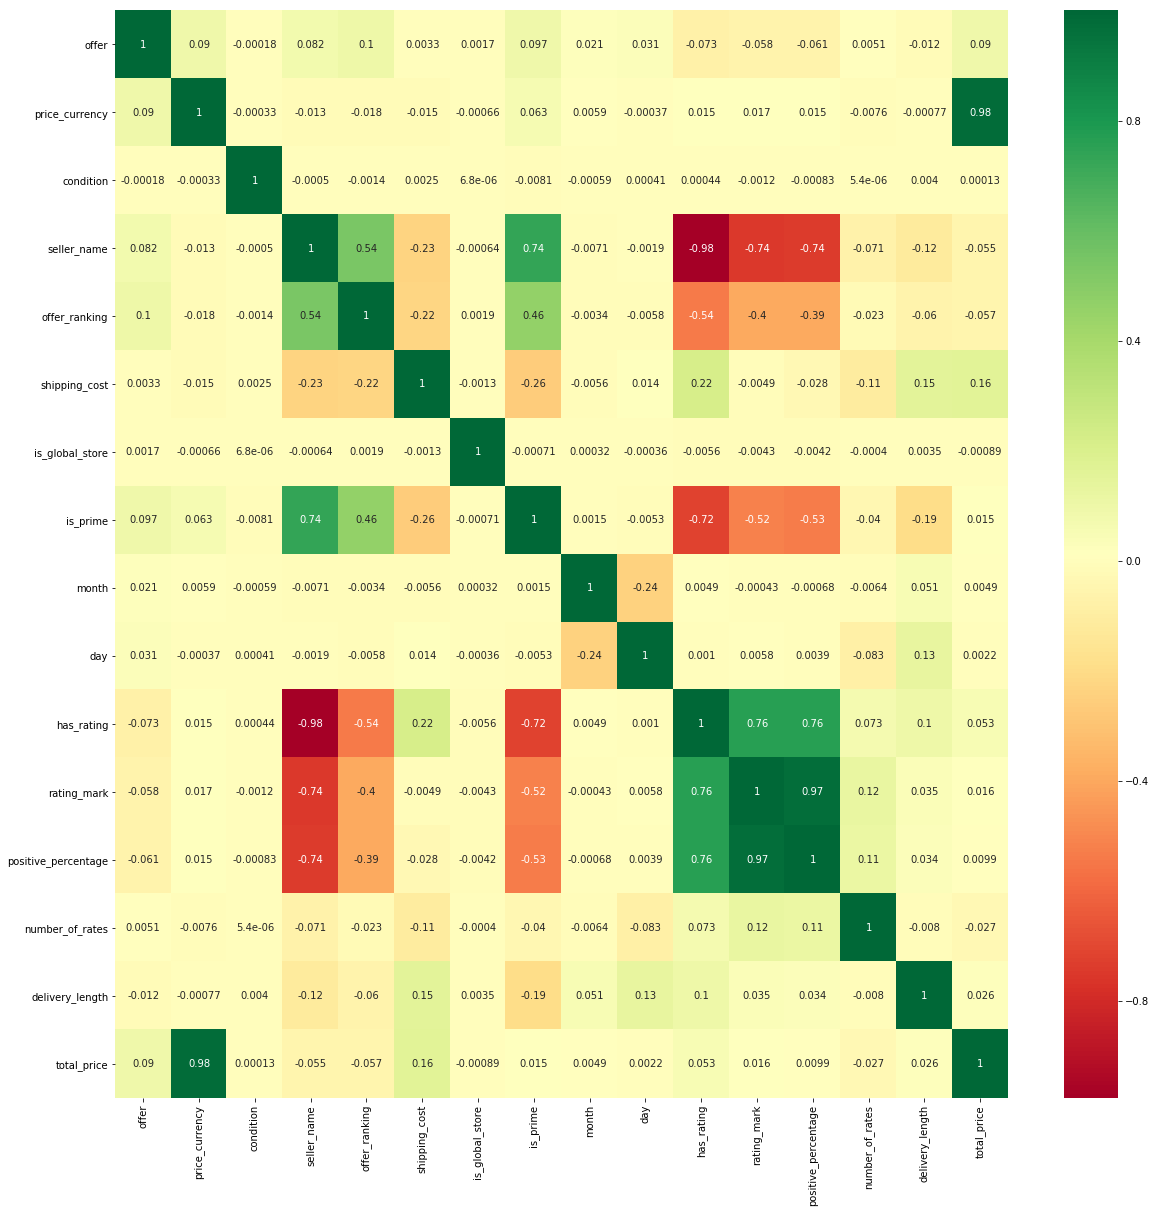

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

On s'intéresse à la colonne **offer_ranking** et plus particulièrement aux corrélations proches de 1 et -1. D'après la matrice il y a une relation entre **offer_ranking** et **seller_name**,**is_prime**,**has_rating** et **rating_mark**. <br /><br />


***

# 4. Gérer un dataset déséquilibré

Un problème se pose avec mon choix sur la colonne cible : **offer_ranking**. En ayant choisi de mettre l'ensemble des offres gagnantes à 1 et les autres à 0, on obtient un dataset déséquilibré qui contiendra beaucoup plus de **offer_ranking=0** que de **offer_ranking=1**.

In [160]:
data.offer_ranking.value_counts()

0    467977
1     79196
Name: offer_ranking, dtype: int64

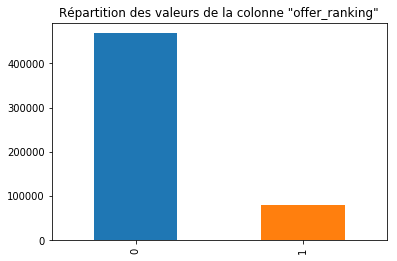

In [161]:
target_count = data.offer_ranking.value_counts()


target_count.plot(kind='bar', title='Répartition des valeurs de la colonne "offer_ranking"');

In [162]:
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Proportion: 5.91 : 1


Comme le montre le graphique ci-dessus, la disparité entre les 2 valeurs est beaucoup trop importante. Cela posera un problème lorsque l'on entrainera notre modèle, on obtiendra une **précision** élevée mais qui sera biaisée du fait que la majorité des 0 seront correctement évalués alors que les 1 seront presque tous faux. <br /><br />
Pour montrer ce phénomène on va entrainer un modèle avec le dataset déséquilibré et un autre que l'on aura équilibré.

On sépare les **features** et la **target** : 

In [163]:
# Import des différentes classifiers que je vais utiliser par la suite.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


y = data["offer_ranking"] 
X = data.drop("offer_ranking",1)  
         

On sépare le dataset en 2 : 

- **Le training set** : qui va nous permettre d’entraîner notre modèle, et sera utilisé par l’algorithme d’apprentissage
- **Le testing set** : qui permet de mesurer l’erreur du modèle final sur des données qu’il n’a jamais vues.

In [164]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

Pour montrer la différence je vais utiliser une **Regression Logistique** qui est un modèle de classification de base et qui devrait prendre peu de temps à entraîner.

In [165]:
# Création du modèle
logisticRegr = LogisticRegression()

Ensuite on entraîne le modèle.

In [166]:
# Train the model
logisticRegr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
from sklearn.metrics import accuracy_score
y_pred = logisticRegr.predict(test_X)
print('Régression Logistique sans optimisation et avec un dataset déséquilibré')
print('Echantillons mal classés: %d' % (test_y != y_pred).sum())
print('Précision: %.2f' % accuracy_score(test_y, y_pred))

Régression Logistique sans optimisation et avec un dataset déséquilibré
Echantillons mal classés: 21952
Précision: 0.87


J'utilise une **matrice de confusion** pour évaluer où se situent les 13% d'erreurs :

Matrice de Confusion:
 [[137925   2399]
 [ 19553   4275]]


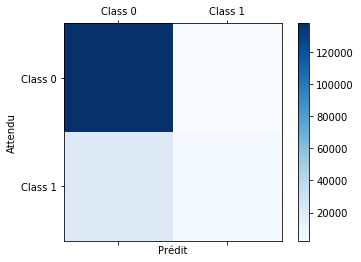

In [168]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=test_y, y_pred=y_pred)
print('Matrice de Confusion:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prédit')
plt.ylabel('Attendu')
plt.show()

Comme prévu on voit que sur :

- Sur **140 324** prédictions (137 925 + 2 399) de la **classe 0**, seulement **2399** (1,7%) ont été mal classés en **classe 1**
- Sur **23 828** prédictions (19 553 + 4 275) de la **classe 1**,  **19 553** (82%) ont été mal classés en **classe 0**

Ainsi notre modèle prédit plutôt correctement les offres qui ne gagnent pas la Buy Box mais se trompe plus de 3 fois sur 4 sur celles qui gagnent la Buy Box. Un problème étant donné que notre but est de savoir les offres gagnantes.


***

Pour pallier ce problème j'ai décidé d'utiliser **l'undersampling** pour réduire le nombre de la **classe 0** afin qu'elle soit équilibrée avec la **classe 1**

In [169]:
# On sépare les 2 classes (0 et 1)
count_class_0, count_class_1 = data.offer_ranking.value_counts()


df_class_0 = data[data['offer_ranking'] == 0]
df_class_1 = data[data['offer_ranking'] == 1]

On applique la fonction **sample()** sur **df_class_0** qui possède l'ensemble des lignes avec un **offer_ranking égale à 0** pour réduire au nombre de lignes de **df_class_1** qui possède des **offer_ranking à 1**

Under Sampling Aléatoire:
1    79196
0    79196
Name: offer_ranking, dtype: int64


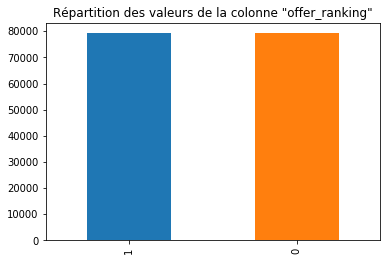

In [170]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Under Sampling Aléatoire:')
print(df_test_under.offer_ranking.value_counts())

df_test_under.offer_ranking.value_counts().plot(kind='bar', title='Répartition des valeurs de la colonne "offer_ranking"');

Maintenant on a bien notre dataset qui est équilibré au niveau de la colonne de target, on va pouvoir re-entrainer notre modèle pour voir comme il réagit.

In [171]:
y_under = df_test_under["offer_ranking"] 
X_under = df_test_under.drop("offer_ranking",1)  

In [172]:
train_X, test_X, train_y, test_y = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

In [173]:
logisticRegr = LogisticRegression()

In [174]:
logisticRegr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
y_pred = logisticRegr.predict(test_X)
print('Régression Logistique sans optimisation et avec un dataset équilibré')
print('Echantillons mal classés: %d' % (test_y != y_pred).sum())
print('Précision: %.2f' % accuracy_score(test_y, y_pred))

Régression Logistique sans optimisation et avec un dataset équilibré
Echantillons mal classés: 13617
Précision: 0.71


Cette fois la précision a diminué de 0.87 à 0.71 mais allons vérifier les valeurs qui ont été mal classées.

Matrice de Confusion:
 [[19164  4366]
 [ 9251 14737]]


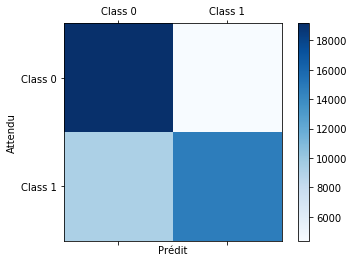

In [176]:
conf_mat = confusion_matrix(y_true=test_y, y_pred=y_pred)
print('Matrice de Confusion:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prédit')
plt.ylabel('Attendu')
plt.show()

Cette fois-ci le résultat est nettement mieux.

- Sur **23 530** prédictions (19 164 + 4 366) de la **classe 0**, **4 366** (18%) ont été mal classés en **classe 1**
- Sur **23 988** prédictions (9 251 + 14 737) de la **classe 1**,  **9 251** (38%) ont été mal classés en **classe 0**

Les résultats sont loins d'êtres encore parfaits mais malgré que le modèle est perdu en précision sur la **classe 0** **(1,7% -> 18% d'erreurs)**, la prédiction de la **classe 1** est bien meilleure **(82% -> 38% d'erreurs)**.

Notre modèle est donc plus fiable, maintenant il faut encore **choisir le bon modèle** car la régression logistique n'est probablement pas le modèle le plus optimal et ensuite il faut encore **optimiser les hyperparamètres** du modèle choisi.

***

# 5. Choisir et évaluer un modèle

Il me reste encore à choisir quel modèle choisir pour classer mes données.

Tout d'abord il faut tenir compte de nos données et de la cible que l'on cherche à définir.

Ici on traite un problème de **supervised learning** car on possède les labels de la colonne offer_ranking. De plus, notre problème est un problème de **classification** car on cherche à trier nos offres perdantes et gagnantes, on peut même parler de **classification binaire** comme il s'agit déterminer si notre offre fait partie de la classe 1 ou 0.

Je choisis donc de m'orienter vers 3 modèles qui me paraissent adaptés à la situation et différents des uns des autres :

- **Régression Linéaire** : un algorithme performant pour la classification binaire.
- **Random Forest** : un bon choix pour de la classification à plusieurs classes.
- **K-Nearest Neighbors (KNN)** : une méthode simple pour classifier par rapport à des groupes de points.

### Régression Logistique

In [177]:
logisticRegr = LogisticRegression()

In [178]:
logisticRegr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
y_pred = logisticRegr.predict(test_X)
print('Régression Logistique sans optimisation et avec un dataset équilibré')
print('Echantillons mal classés: %d' % (test_y != y_pred).sum())
print('Précision: %.2f' % accuracy_score(test_y, y_pred))

Régression Logistique sans optimisation et avec un dataset équilibré
Echantillons mal classés: 13617
Précision: 0.71


### Random Forest

In [180]:
forest = RandomForestClassifier()

In [181]:
forest.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [182]:
y_predF = forest.predict(test_X)
print('Random Forest sans optimisation et avec un dataset équilibré:')
print('Echantillons mal classés: %d' % (test_y != y_predF).sum())
print('Précision: %.2f' % accuracy_score(test_y, y_predF))

Random Forest sans optimisation et avec un dataset équilibré:
Echantillons mal classés: 3788
Précision: 0.92


### K-Nearest Neighbors

In [183]:
knn = KNeighborsClassifier()

In [184]:
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [185]:
y_predK = knn.predict(test_X)
print('KNN sans optimisation et avec un dataset équilibré:')
print('Echantillons mal classés: %d' % (test_y != y_predK).sum())
print('Précision: %.2f' % accuracy_score(test_y, y_predK))

KNN sans optimisation et avec un dataset équilibré:
Echantillons mal classés: 5551
Précision: 0.88


Après avoir utilisé ces 3 modèles on obtient une précision :

- **Régression Linéaire** : 0.71
- **Random Forest** : 0.92
- **K-Nearest Neighbors (KNN)** : 0.88

Maintenant on va chercher à améliorer la performance de nos modèles en modifiant les hyper paramètres.

# 6. Régler les paramètres des modèles

Pour finir je vais utiliser un processus de **grid-searching** pour trouver les paramètres optimaux de mes modèles.

À noter que la liste de paramètres que j'utilise pour chaque modèle est assez restreinte compte tenu du fait que ma puissance de calcul est assez limitée et que certains **grid-search** peuvent durer plusieurs heures.

<div class="alert alert-block alert-info">
    <b>Remarque:</b> Ici je fais une erreur en utilisant un GridSearch sur un échantillon de ma donnée et non pas sur le dataset entier car le Random Forest va subir de l'overfitting ce dont je vais aperçevoir par la suite.
</div>

### Optimisation Régression Logistique

In [97]:
# Optimisation pour la régression logistique

def logisticR_param_selection(X, y, nfolds):
    
    # On définit les paramètres à tester
    param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    
    return grid_search.best_params_

In [98]:
from sklearn.model_selection import GridSearchCV

logisticR_param_selection(train_X,train_y,5)

{'C': 1000.0, 'penalty': 'l1'}

### Optimisation Random Forest

In [90]:
#Optimisation pour le random forest

def randomF_param_selection(X, y, nfolds):
    
     # On définit les paramètres à tester
    param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
    
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    
    return grid_search.best_params_

In [91]:
randomF_param_selection(train_X,train_y,5)

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

### Optimisation KNN

In [92]:
# Optimisation pour le KNN

def knn_param_selection(X, y, nfolds):
    
     # On définit les paramètres à tester
    param_grid = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
    
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    
    return grid_search.best_params_

In [93]:
knn_param_selection(train_X,train_y,5)

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 4}

On a une liste de paramètres optimaux pour chaque algorithme, on va donc les utiliser sur le dataset entier pour faire nos prédictions.

***

## Evaluation sur le dataset entier

Pour chaque algorithme, je vais faire 2 prédictions sur le dataset entier : 

- La première utilisera les hyper paramètres optimisés précedement.
- La deuxième utilisera les hyper paramètres par défaut.

### Régression Logistique

#### Avec paramètres optimaux

In [195]:
logisticRegr = LogisticRegression(C=1000, penalty="l1")

In [196]:
logisticRegr.fit(train_X, train_y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [197]:
y_pred2 = logisticRegr.predict(X)
print('Régression Logistique avec optimisation sur le dataset entier')
print('Echantillons mal classés: %d' % (y != y_pred2).sum())
print('Précision: %.2f' % accuracy_score(y, y_pred2))

Régression Logistique avec optimisation et avec un dataset équilibré
Echantillons mal classés: 76962
Précision: 0.86


#### Sans paramètres optimaux

In [212]:
logisticRegr2 = LogisticRegression()

In [213]:
logisticRegr2.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [214]:
y_pred3 = logisticRegr2.predict(X)
print('Régression Logistique avec optimisation sur le dataset entier')
print('Echantillons mal classés: %d' % (y != y_pred3).sum())
print('Précision: %.2f' % accuracy_score(y, y_pred3))

Régression Logistique avec optimisation sur le dataset entier
Echantillons mal classés: 117093
Précision: 0.79


### Random Forest

#### Avec paramètres optimaux

In [198]:
forest = RandomForestClassifier(criterion='gini', max_depth=8, max_features='sqrt',n_estimators=200 )

In [199]:
forest.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [200]:
y_predF2 = forest.predict(X)
print('Random Forest avec optimisation sur le dataset entier:')
print('Echantillons mal classés: %d' % (y != y_predF2).sum())
print('Précision: %.2f' % accuracy_score(y, y_predF2))

Random Forest avec optimisation et avec un dataset équilibré:
Echantillons mal classés: 68370
Précision: 0.88


#### Sans paramètres optimaux

In [205]:
forest2 = RandomForestClassifier()

In [206]:
forest2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [208]:
y_predF3 = forest2.predict(X)
print('Random Forest avec optimisation sur le dataset entier:')
print('Echantillons mal classés: %d' % (y != y_predF3).sum())
print('Précision: %.2f' % accuracy_score(y, y_predF3))

Random Forest avec optimisation sur le dataset entier:
Echantillons mal classés: 33375
Précision: 0.94


### K-Nearest Neighbors

#### Avec paramètres optimaux

In [201]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_jobs=-1, n_neighbors=4)

In [202]:
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [203]:
y_predK2 = knn.predict(X)
print('KNN sans optimisation sur le dataset entier:')
print('Echantillons mal classés: %d' % (y != y_predK2).sum())
print('Précision: %.2f' % accuracy_score(y, y_predK2))

KNN sans optimisation et avec un dataset équilibré:
Echantillons mal classés: 52266
Précision: 0.90


#### Sans paramètres optimaux

In [209]:
knn2 = KNeighborsClassifier()

In [210]:
knn2.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [211]:
y_predK3 = knn2.predict(X)
print('KNN sans optimisation sur le dataset entier:')
print('Echantillons mal classés: %d' % (y != y_predK3).sum())
print('Précision: %.2f' % accuracy_score(y, y_predK3))

KNN sans optimisation sur le dataset entier:
Echantillons mal classés: 72994
Précision: 0.87


### Matrice de confusion du meilleur modèle (Random Forest sans optimisation)

Matrice de Confusion:
 [[436991  30986]
 [  2389  76807]]


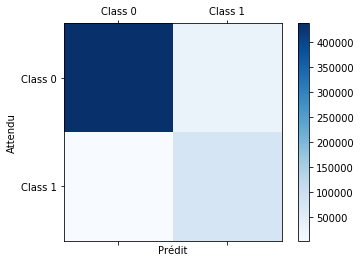

In [216]:
conf_mat = confusion_matrix(y_true=y, y_pred=y_predF3)
print('Matrice de Confusion:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prédit')
plt.ylabel('Attendu')
plt.show()

In [303]:
results = [
    [0.79,0.86],
    [0.94,0.88],
    [0.87,0.90],    
]

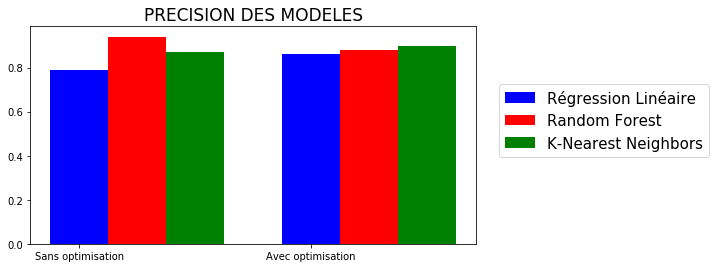

In [304]:
x= np.arange(2)

algo = "Sans optimisation", "Avec optimisation"


plt.figure(figsize=(8,4))
plt.bar(x+0.00, results[0], color="b", width=0.25, label = "Régression Linéaire" )
plt.bar(x+0.25, results[1], color="r", width=0.25, label = "Random Forest" )
plt.bar(x+0.5, results[2], color="g", width=0.25, label = "K-Nearest Neighbors" )

plt.title("PRECISION DES MODELES", fontsize = 17)
plt.legend(fontsize = 15, loc = (1.05,0.4))



plt.xticks(x,algo)

plt.show()

On obtient les résultats suivants : 

- **Régression Linéaire** : **0.79 -> 0.86** de précision avec l'optimisation des paramètres, soit une **augmentation** de **0.07**
- **Random Forest** : **0.94 -> 0.88** de précision avec l'optimisation des paramètres, soit une **baisse** de **0.06**
- **K-Nearest Neighbors (KNN)** : **0.87 -> 0.90** de précision avec l'optimisation des paramètres, soit une **augmentation** de **0.03**

On conclut donc que notre meilleur modèle pour prédire si une offre remporte la Buy Box est le Random Forest sans optimisation avec une précision de 0.94. Cependant **on constate qu'avec l'optimisation le score a baissé ce qui n'est pas normal** et que je vais expliquer dans la partie Bilan qui suit.

***


# 7. Bilan


Tout d'abord ce hackathon était très enrichissant et intéressant puisqu'il s'agissait d'un cas d'étude vraiment concret. Le but était de **construire un modèle pour prédire quelle offre remporte la Buy box** et aussi **d'expliquer quels sont les paramètres les plus importants**.

Pour la partie modèle j'ai répondu à la problématique en utilisant un algorithme de **Random Forest** qui a obtenu une précision de **0.94** ce qui est élevé. Néanmoins j'aurais pu améliorer le score si j'avais mieux utilisé le **GridSearching** et je reviendrai sur ce point juste après. Je suis conscient aussi que le score que j'ai obtenu est loin de représenter la véritable efficacité de ce modèle puisque je l'ai utilisé uniquement sur un dataset et que la précision pour un dataset totalement différent sera probablement plus faible.

Pour la partie sur l'importance des paramètres, je pensais que le prix et le cout de la livraison allaient être les paramètres les plus influents sur la position de l'offre. Or j'avais tort le **nom du vendeur**, **le nombre d'avis**, **les notes obtenues par l'offre** ainsi que s'il s'agit d'une offre **prime** ont été d'après mes analyses les paramètres les plus importants. J'en déduis donc qu'en général une personne préfère dépenser plus si elle est sûre que le produit a une bonne notation et est vendu par un vendeur de confiance.


Enfin, j'aimerais revenir sur certaines parties que j'estime avoir mal traité ou sur lesquels j'ai des doutes : 

- **Sur la colonne seller_name où je décide de remplacer les cases vides par Amazon** : Après avoir approfondi mes recherches sur le fichier, je me suis rendu compte que certains vendeurs autres que Amazon étaient aussi remplis de valeurs null et que donc j'avais fait une erreur. J'aurais donc dû faire preuve davantage de vigilance et revoir comment parser cette colonne.


- **Sur la colonne buy_box_owner où je décide de supprimer la colonne** : Comme avant j'ai manqué de l'information et j'ai aperçu que dans la grande majorité des cas cette colonne possédait le nom de l'expéditeur ainsi que celui du vendeur. De ce fait, j'aurais pu ajouter une colonne 'Expediteur' pour analyser si celui-ci avait un impact sur le classement de l'offre.


- **Sur les fonctions pour traiter les commentaires** : Les fonctions pour trouver le nombre de commentaires ou encore le pourcentage de commentaires positifs sont très basiques et peu robustes. J'aurais dû utiliser des **expressions régulières** pour m'assurer une meilleure robustesse.


- **Sur la fonction pour calculer le temps de livraison** : Cette fonction est une approximation du temps de livraison car je ne prends pas en considération chaque mois et me base uniquement sur un mois à 31 jours alors que certains sont à 30 jours. Ainsi ma fonction est moins précise, j'aurais dû aussi parser les mois pour ensuite les transformer en chiffres et les comparer avec ma colonne "Month"


- **Sur la méthode d'undersampling** : J'ai utilisé un undersampling aléatoire pour réduire ma classe en surnombre ce qui reste une méthode basique. Avec un peu de recherche je suis convaincu de pouvoir trouver une méthode plus performante.


- **Sur le choix de l'undersampling** : J'ai choisi l'undersampling car cela me paraissait judicieux car je redoutais l'overfitting en oversamplant la classe 1. Néanmoins je n'ai pas testé les 2 méthodes, chose que j'aurai dû faire pour m'assurer que ma décision était la bonne.


- **La normalisation** : Je n'ai pas normalisé mes données ce qui je pense avec du recul est aussi une erreur étant que mes différentes features ont toutes des portées différentes. Cela aurait probablement amélioré la précision de mon modèle.


- **La baisse de précision du random forest avec l'optimisation** : Ici je pense avoir fait l'erreur d'effectuer mon GridSearch sur un sample du dataset et pas le dataset lui-même. Le résultat est que mes paramètres ont subi de l'overfitting et qu'ils n'étaient pas adaptés pour le dataset entier ce qui résulte d'une perte de précision.